
# Working with data

In [1]:
import altair as alt

**NOTA BENE** If you are in JupyterLab, comment the following line !

In [2]:
# comment this if you are in JupyterLab
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

## Reproducible research

- replication crisis
- open research: share data, code and models
- code your data workflow !

## Data workflow


<img src="img/data-science-explore.png" width="70%">

Reproduced from [R for data science](https://r4ds.had.co.nz/)

# Good programming habits

## Getting help

- read the docs, eg [sklearn documentation](https://scikit-learn.org/stable/index.html) is really good
- programming Q&A : [StackOverflow](https://stats.stackexchange.com/)
- ML-Stats Q&A : [CrossValidated](https://stackoverflow.com/)
- [Jupyter gallery](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
- cheatsheets !

<img src="img/cv-logo.png" width="25%" style="display:inline">  <img src="img/so-logo.png" width="20%" style="display:inline">

## Improve your programming skills 

- fight against software entropy !
- [code smell](https://en.wikipedia.org/wiki/Code_smell), [spaghetti code](https://en.wikipedia.org/wiki/Spaghetti_code), [big ball of mud](https://en.wikipedia.org/wiki/Big_ball_of_mud)
- "kiss" : keep it stupid simple
- "dry" : don't repeat yourself
- use abstractions 
    - refactor using functions [FP](https://docs.python.org/3.7/howto/functional.html) 
    - and classes [OOP](https://python-textbok.readthedocs.io/en/1.0/Object_Oriented_Programming.html)


The Zen of Python

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Monitoring

- painfully slow program ?
    - IO-bound : reading and writing from disk
    - CPU-bound : computing 

- program crashes ?
    - out-of-memory errors

- monitor CPU, RAM, and IO usage
    - OS monitor or command line `top`, `iostat`

## Terminal 

<img src="img/terminal.png" width="10%" style="display:inline"> Don't be afraid to use it ;) There are many excellent tutorials 


- use tab-completion !
- explore the filesystem : `cd`, `pwd`, `ls`
- copy files : `cp`
- connect to remote: `ssh user@host`
- scp files from/to remote: `scp`

## Version control

Does your project look like this ?

<img src="img/version-control.png" alt="" width="50%">

## Version control 


<img src="img/Octocat.png" width="10%" style="display:inline">  <img src="img/gitlab-logo.png" width="10%" style="display:inline"> Use a version control software like `git` to:

- backup your code on a **remote** host eg [github](https://github.com/), [gitlab](https://about.gitlab.com/)
- write code collaboratively : **repository**
- download and modify someone else project : **clone**
- track changes history : **commit logs**
- switch between parallel versions of your software : **branches**
- easily revert to earlier state, **merge** different versions

# Prepare data

## Get and store data

- if you are lucky data can be fetched from an API or database:
    - datasets for ML: [mldata](https://www.mldata.io/datasets/), [UCI repository](http://archive.ics.uci.edu/ml/datasets.php) and [kaggle](https://www.kaggle.com/datasets)
    - weather data: [openweathermap](https://openweathermap.org/api)
    - geodata: [openstreetmap](https://wiki.openstreetmap.org/wiki/Databases_and_data_access_APIs)
    - genomic data: [UCSC](https://genome-euro.ucsc.edu)

- it's a good idea to store your data on a local/server database 

<img src="img/mysql-logo.png" width="10%" style="display:inline">  <img src="img/postgres-logo.png" width="10%" style="display:inline">

## API demo

- we fetch an API with an http request : url and query string
- the API usually returns [JSON](https://en.wikipedia.org/wiki/JSON) data

**Example** http://api.openweathermap.org/data/2.5/weather?q=Paris,france&appid=YOUR_APP_ID

## Tidy data

Hadley Wickham's definition:
> 1.  Each variable forms a column.
> 2.  Each observation forms a row.
> 3.  Each type of observational unit forms a table.

**Reference** https://vita.had.co.nz/papers/tidy-data.pdf

## Clean data

Unfortunately it will often take a lot of time :(

- duplicated rows
- inconsistent records
- abnormal values
- reshape data to make it tidy

## Data wrangling in python

<img src="img/pandas-logo.png" width="70%"> 

In [4]:
import pandas as pd
df = pd.read_csv("cycle-share-dataset/station.csv")
df.head(4)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN


## Group-by


We group rows by values in column "col" and compute an **aggregate function** on each group.
<img src="img/groupby.png" width="70%"> 

### Demo

In [5]:
medical_test = pd.read_csv("data/fake_medical_test.csv")
medical_test.head()

,treatment,age,sick
0,A,20,True
1,A,32,False
2,B,12,False
3,B,45,False
4,B,80,True


In [6]:
medical_test_grouped = medical_test.groupby("treatment").agg(
    {"age":["min","mean", "max"], "sick":["mean"]}
)
medical_test_grouped

age                     sick
          min       mean max      mean
treatment                             
A          20  26.000000  32  0.500000
B          12  45.666667  80  0.333333

In [7]:
medical_test_grouped.columns = [
    "_".join(t) for t in medical_test_grouped.columns.values
]
medical_test_grouped = medical_test_grouped.reset_index()
medical_test_grouped

,treatment,age_min,age_mean,age_max,sick_mean
0,A,20,26.000000,32,0.500000
1,B,12,45.666667,80,0.333333


## Merge / Join

<img src="img/merge.png" width="70%"> 

### Demo

In [8]:
trips = pd.read_csv("data/fake_trips.csv")
trips.head()

,date,trips
0,2018-10-01,421
1,2018-10-02,212
2,2018-10-03,183


In [9]:
weather = pd.read_csv("data/fake_weather.csv")
weather.head()

,date,event,temperature
0,2018-10-01,sun,15
1,2018-10-03,rain,7


In [10]:
trips_merged = pd.merge(trips, weather, on="date", how="left")
trips_merged

,date,trips,event,temperature
0,2018-10-01,421,sun,15.0
1,2018-10-02,212,NaN,NaN
2,2018-10-03,183,rain,7.0


## Pivot

<img src="img/pivot.png" width="80%"> 

### Demo

In [11]:
sensor_data = pd.read_csv("data/fake_sensor_data.csv")
sensor_data # not tidy !

,date,sensor,values
0,2018-01-01,pressure,101
1,2018-01-01,temperature,19
2,2018-01-02,pressure,100
3,2018-01-02,temperature,21
4,2018-01-02,humidity,30


In [12]:
sensor_data_pivoted = pd.pivot(
    sensor_data, index="date", columns="sensor", values="values"
)
sensor_data_pivoted # tidy !

sensor,humidity,pressure,temperature
date,,,
2018-01-01,NaN,101.0,19.0
2018-01-02,30.0,100.0,21.0


In [13]:
sensor_data_pivoted.columns.name = None
sensor_data_pivoted = sensor_data_pivoted.reset_index()
sensor_data_pivoted # tidy !

,date,humidity,pressure,temperature
0,2018-01-01,NaN,101.0,19.0
1,2018-01-02,30.0,100.0,21.0


## Melt

The "opposite" of pivot 

<img src="img/melt.png" width="70%"> 

### Demo

In [14]:
glucose_levels = pd.read_csv("data/fake_glucose_levels.csv")
glucose_levels # not tidy !

,patient,age,treatment,2018-01-01,2018-01-02,2018-01-03,2018-01-04
0,1,30,A,80,85,82,81
1,2,60,A,125,128,122,123
2,3,20,B,143,142,147,141
3,4,21,B,90,93,92,92


In [15]:
glucose_levels_melted = pd.melt(
    glucose_levels, 
    id_vars=["patient", "age", "treatment"], var_name="date", value_name="glucose"
)
glucose_levels_melted.head() # tidy !

,patient,age,treatment,date,glucose
0,1,30,A,2018-01-01,80
1,2,60,A,2018-01-01,125
2,3,20,B,2018-01-01,143
3,4,21,B,2018-01-01,90
4,1,30,A,2018-01-02,85


## Prepare data for machine learning

- the features $X$ and target $y$ must be **numeric arrays**

Handling special data-types
- categorical values : [one-hot encoding](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features)
- text : [bag of words representation](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
- images : RGB array
- missing values: [imputation](https://scikit-learn.org/stable/modules/impute.html#impute)

## Exercice

For the following ML tasks, how would you construct the $X$ and $y$ arrays ?

- **automatic video description**
    - raw data =  bunch of mp4 videos and movie scripts (txt files)

- **generate Latex files or C code**  
    - raw data = a book written in LaTeX  or the Linux C source code
    - see https://karpathy.github.io/2015/05/21/rnn-effectiveness/

# Visualize data

## Misleading graph

### Truncated axis

<img src="img/bar-chart.png" width="80%">

### Distorted effect of perspective

<img src="img/pie-chart.png" width="80%">

## Grammar of graphics

Every statistical chart can be viewed as **encoding data to graphical attributes**

### Scatterplot

```python
x = "Horsepower", y = "Miles_per_Gallon", color= "Origin"
```
<img src="img/scatterplot.png" width="50%">

### Stacked bar chart

```python
x = sum("yield"), y = "variety", color= "site"
```
<img src="img/stacked-bar-chart.png" width="70%">

## Let's make a simple chart

Fuel consumption for several cars.

<img src="img/small-multiple.png" width="80%">

Dataset on the fuel consumption of cars

In [16]:
cars = pd.read_csv("data/cars.csv")
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970


## Declarative (Altair)

In Altair, you declare *what* you want to visualize, using the grammar of graphics.

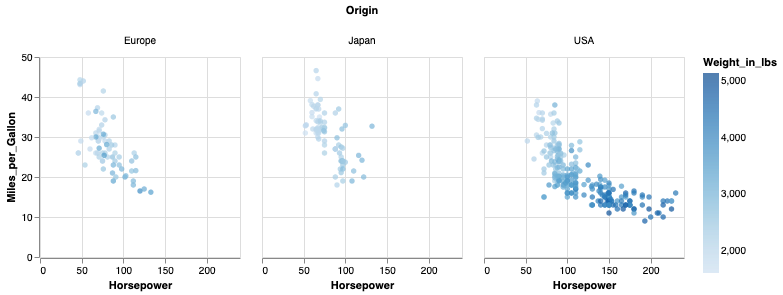

In [17]:
import altair as alt

alt.Chart(cars).mark_circle().encode(
    x="Horsepower", y="Miles_per_Gallon", color="Weight_in_lbs", column="Origin"
).properties(width=200, height=200)

## Imperative (Matplotlib)

In Matplotlib, you must tell *how* to build the visualization. Laborious ! 

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(
    1, 3, figsize=(10, 4), sharey=True, sharex=True, constrained_layout = True
)
vmin, vmax = cars["Weight_in_lbs"].min(), cars["Weight_in_lbs"].max()

for ax, origin in zip(axs, ["Europe", "USA", "Japan"]):
    data = cars[cars["Origin"] == origin]
    im = ax.scatter(
        x = data["Horsepower"], y = data["Miles_per_Gallon"], c = data["Weight_in_lbs"], 
        cmap="Blues", vmin = vmin, vmax = vmax
    )
    ax.set(title = origin, xlabel="Horsepower",  ylabel="Miles_per_Gallon")

cbar = fig.colorbar(im)
cbar.ax.set_title("Weight_in_lbs");

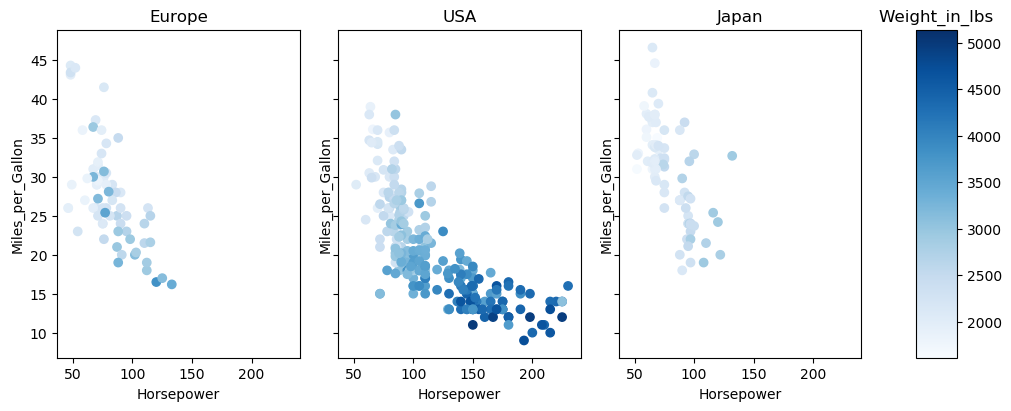

In [19]:
%matplotlib inline
fig

## Interactivity

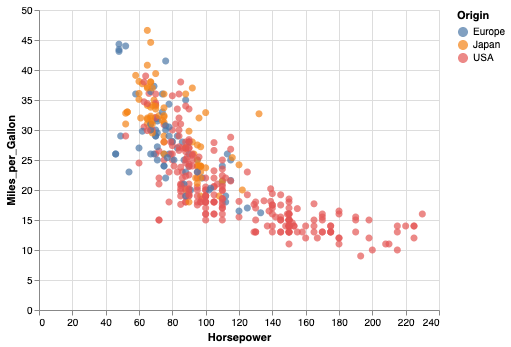

In [20]:
# Let's add a tooltip.
alt.Chart(cars).mark_circle(size=50).encode(
    x='Horsepower', y='Miles_per_Gallon', color='Origin',
    tooltip=['Name', 'Origin', 'Year', 'Cylinders']
).interactive()

# Big data

## Big data is ...

1. marketing bullshit
2. a technical difficulty for data processing
3. a blessing/curse for machine learning

## As a technical difficulty

Here big data means "too big to be stored on a single disk". Hence:
    
- most people/companies *don't* have big data
- you need distributed storage eg [HDFS](https://en.wikipedia.org/wiki/Apache_Hadoop#Hadoop_distributed_file_system)
- and distributed computing eg [MapReduce](https://en.wikipedia.org/wiki/MapReduce)

## As a curse for machine learning

Say $N$ = number of observations and $P$ = number of features.

Wide data $P\gg N$, too few observations for many features

- realm of **high-dimensional statistics**, eg **genomics**
- we can only afford very simple models and seek robustness
    
**Reference** The Elements of Statistical Learning, chapter 18

## As a blessing for machine learning

Say $N$ = number of observations and $P$ = number of features.

Long data $N \gg P$, many observations

- can fit very complex models (deep learning)
- if data does not fit in memory, must use **online** or **mini-batch** learning

# Resources 

Programming skills for data science

- [R for data science](https://r4ds.had.co.nz/)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

Data visualization
- The Visual Display of Quantitative Information, Edward Tufte
